# Linear and polynomial regression examples:

For the same data, we will estimate a linear model, and a polynomial model :
### Expected linear model (obtained from Excel):
y = -0,052x + 62,561

### Expected Polynomial with degree 2 model (obtained also from Excel):
y = 0,0214 x<sup>2</sup> - 2,1948 x + 96,306

## Python Code :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# You can load your file with numpy :

# f= open("regression-example-data.csv")
# data = np.loadtxt(f, delimiter=";")
# print(data)

# Or with pandas. In may case I used pandas to set the decimal separator (My file comes from excel)

df = pd.read_csv("Data/Linear-regression-example-data.csv", delimiter=";", decimal=",")
data = df.to_numpy()

In [3]:
df.head()

,X,Y
0,84.3590,59.8077
1,72.8205,52.5000
2,96.4103,49.4231
3,7.1795,90.1923
4,10.2564,80.9615


In [4]:
print (data[:10,:])

[[84.359  59.8077]
 [72.8205 52.5   ]
 [96.4103 49.4231]
 [ 7.1795 90.1923]
 [10.2564 80.9615]
 [ 5.8974 14.8077]
 [76.4103 56.3462]
 [75.641  84.0385]
 [73.3333 49.4231]
 [21.5385 50.1923]]


In [5]:
data.shape

(150, 2)

In [6]:
X = data[:,0]   # First column
Y = data[:,1]   # Second Column

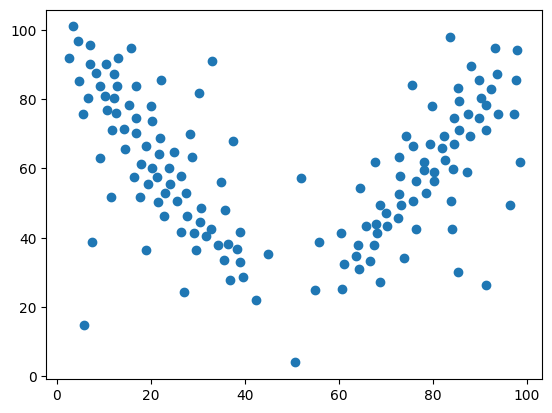

In [7]:
plt.scatter (X, Y)

Instanciate the linear model

In [8]:
reg = linear_model.LinearRegression()

Convert X from 1D to 2D :

In [9]:
print (X)

[84.359  72.8205 96.4103  7.1795 10.2564  5.8974 76.4103 75.641  73.3333
 21.5385 38.9744 18.9744 16.9231 85.3846  9.2308 34.359  89.7436 10.5128
 15.8974 80.2564 85.641   7.4359 30.2564 76.4103  6.6667 19.4872 31.7949
 93.3333 15.3846 73.0769 82.3077 13.0769 12.5641 55.8974 91.2821 34.8718
 24.1026 11.7949 79.7436 68.7179 90.2564 12.8205 38.4615 16.4103 87.4359
 11.5385 98.4615 33.0769 26.4103  5.641   9.2308 91.2821 38.9744 83.8462
 84.6154 68.7179 12.3077 28.7179 27.4359 75.8974 12.3077 89.7436 20.2564
 18.9744 83.5897 50.7692 97.9487 22.8205 68.2051 16.9231 21.7949 30.7692
 16.9231 54.8718 85.3846 78.2051 39.7436 92.3077 42.3077 78.2051 91.2821
 20.     36.9231 74.359  67.6923 10.7692 84.1026 75.8974 93.8462 73.8462
  7.1795 87.1795 60.5128  3.5897 14.359  65.8974 70.     80.2564 24.8718
 35.641  64.1026 60.7692 84.6154 17.6923 21.2821 64.6154 30.5128 70.2564
 27.1795 82.0513 26.4103  8.4615 52.0513 36.4103 22.3077 17.9487 44.8718
 29.7436 27.6923 63.5897 67.4359 14.6154 72.8205 28

In [10]:
print (X.shape)

(150,)


In [12]:
X = X.reshape(-1, 1)
print (X[:10, :])

[[84.359 ]
 [72.8205]
 [96.4103]
 [ 7.1795]
 [10.2564]
 [ 5.8974]
 [76.4103]
 [75.641 ]
 [73.3333]
 [21.5385]]


Training (fitting) the model using our data 

In [13]:
reg.fit(X,Y)

LinearRegression()

In [14]:
reg.coef_

array([-0.05203966])

In [15]:
reg.intercept_

62.5612467676423

In [16]:
Y_predicted = reg.predict(X)

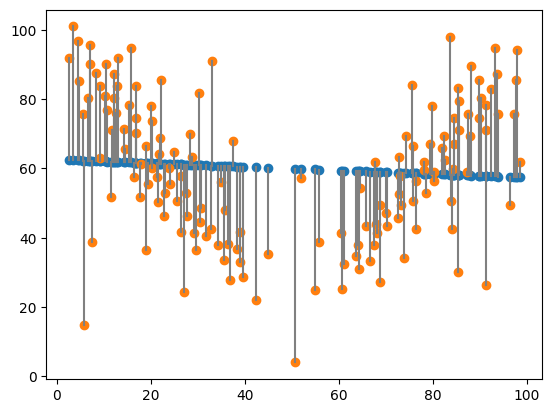

In [17]:
for i in range (X.size):
    plt.plot( (X[i],X[i]) , (Y[i],Y_predicted[i]) ,c='gray')
    
plt.scatter (X, Y_predicted)
plt.scatter (X, Y)

In [18]:
reg.score(X, Y)

0.0060476830063397324

# Polynomial model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

poly =  make_pipeline(PolynomialFeatures(degree=3), Ridge())

poly.fit(X, Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [20]:
poly.predict([[150],[50]])

array([234.78657032,  40.00869908])

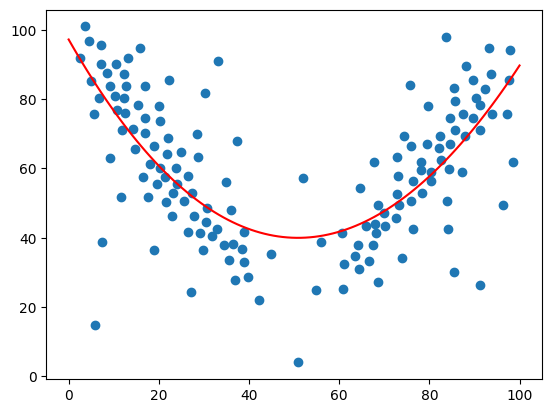

In [21]:
#for i in range (X.size):
#    plt.plot( (X[i],X[i]) , (Y[i],Y_predicted_poly[i]) ,c='gray')
    
plt.scatter (X, Y)

# This time we choose to display a line instead of a set of predicted points
x_plot = np.linspace(0, 100, 100)
X_plot = x_plot[:, np.newaxis]  # Same as reshape(-1,1)
Y_predicted_poly = poly.predict(X_plot)

plt.plot (X_plot, Y_predicted_poly, c="red")

In [22]:
poly.steps[1][1].coef_

array([ 0.00000000e+00, -2.28993362e+00,  2.36869026e-02, -1.53744061e-05])

In [23]:
poly.steps[1][1].intercept_

97.20992410446087

In [24]:
poly.score(X, Y)

0.43239925973070603

# Exercice :
Split the data into two groups (X<50 and X>=50) and apply a linear regression for each group.

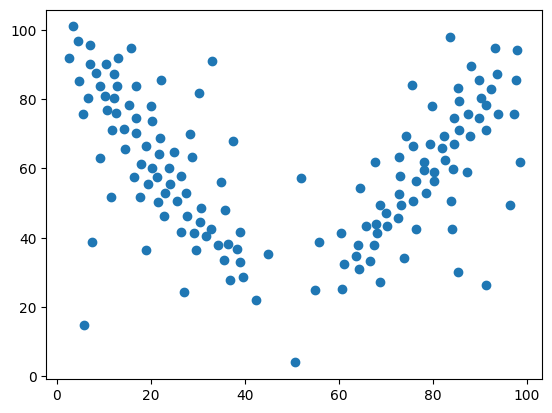

In [25]:
plt.scatter(X, Y)

In [62]:
median = np.median(X)
min = np.min(X)
max = np.max(X)
mean = np.mean(X)

print(f"min = {min}\nmedian = {median}\nmean = {mean}\nmax = {max}")

min = 2.5641
median = 39.359
mean = 48.67521466666666
max = 98.4615


In [63]:
inf_condition = X <= mean
inf_index = np.where(inf_condition)
sup_index = np.where(~inf_condition)

x_inf, y_inf = X[condition], Y[inf_index[0]]
x_sup, y_sup = X[~condition], Y[sup_index[0]]

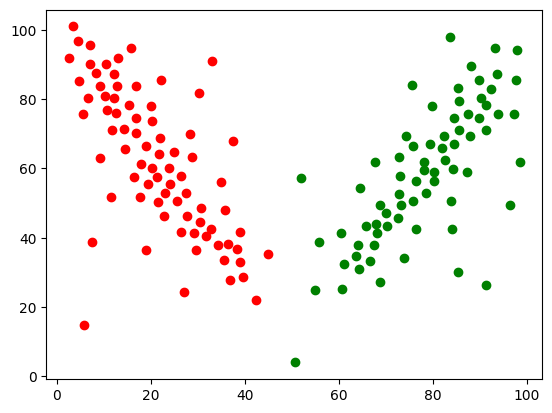

In [64]:
plt.figure()
plt.scatter(x_inf, y_inf, c="red")
plt.scatter(x_sup, y_sup, c="green")

In [65]:
x_inf.shape, x_sup.shape

((78,), (72,))

In [66]:
x_inf = x_inf.reshape(x_inf.shape[0], -1)
x_sup = x_sup.reshape(x_sup.shape[0], -1)

In [67]:
reg_inf = linear_model.LinearRegression()
reg_inf.fit(x_inf, y_inf)

LinearRegression()

In [68]:
reg_inf.coef_

array([-1.27273539])

In [69]:
reg_inf.intercept_

89.01906339020275

In [70]:
x_inf.shape

(78, 1)

In [71]:
y_inf_predict = reg_inf.predict(x_inf)

In [72]:
reg_sup = linear_model.LinearRegression()
reg_sup.fit(x_sup, y_sup)

LinearRegression()

In [73]:
reg_sup.coef_

array([1.193187])

In [74]:
reg_sup.intercept_

-35.17121540636472

In [75]:
y_sup_predict = reg_sup.predict(x_sup)

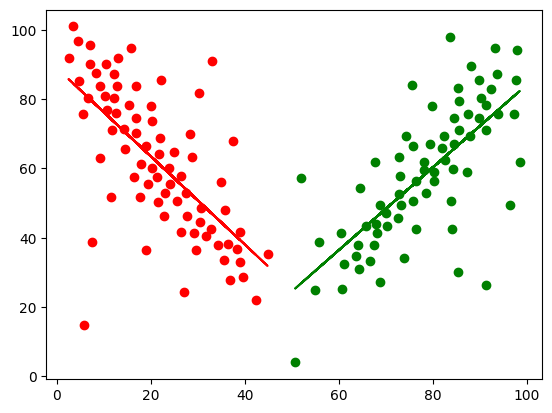

In [76]:
plt.figure()
plt.scatter(x_inf.reshape(x_inf.shape[0],), y_inf, c="red")
plt.plot(x_inf.reshape(x_inf.shape[0],), y_inf_predict, c='red')
plt.scatter(x_sup.reshape(x_sup.shape[0],), y_sup, c="green")
plt.plot(x_sup.reshape(x_sup.shape[0],), y_sup_predict, c='green')

#### *KPOVIESSI OLAOLOUWA AMICHE STEPHANE*